# Linear regression on panel-wise sums

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt

In [2]:
import operate_datasets
import model_visualisation
import model_evaluation

Welcome to JupyROOT 6.18/00


## Load data

In [3]:
full_X, full_y = operate_datasets.load_dataset('~/snd_data/new_dataset/', 'longitudal')

In [4]:
X_train, y_train, _, _ = operate_datasets.split_dataset(full_X, full_y)

#min_clip = 25
#X_train, y_train = operate_datasets.clip_dataset(X_train, y_train, min_clip)

## Fit regression

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [6]:
reg_l2 = LinearRegression().fit(X_train, y_train) # positive=True ?
#reg_l1 = Lasso(positive=False).fit(X_train, y_train) # positive=True ???

score_l2 = reg_l2.score(X_train, y_train)

print('L2: ', score_l2)

y_pred_l2 = reg_l2.predict(X_train)

L2:  0.004779199600631223


## Visualise results

In [7]:
X_sum = X_train.sum(axis=1).reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [8]:
print('y = kx + b')
print('k', reg_l2.coef_)
print('b', reg_l2.intercept_)

y = kx + b
k [1.86384585e-05 2.34014442e-05 2.28584841e-05 1.73210201e-05
 2.40839164e-05]
b 0.19566164651942536


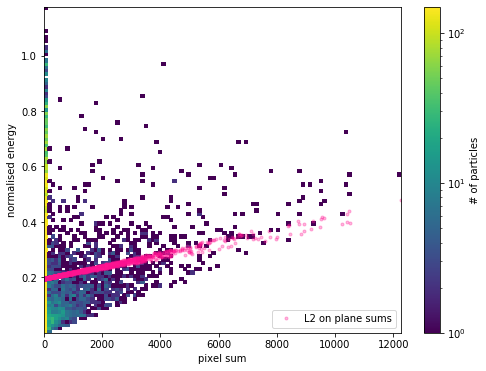

In [9]:
model_visualisation.plot_2d_energy_hist(X_sum, y_train, y_pred_l2, 'L2 on plane sums') 

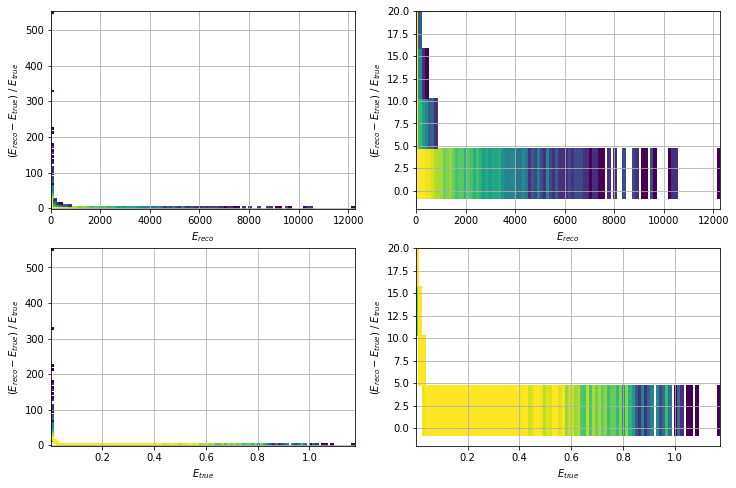

In [10]:
model_visualisation.plot_res_vs_energy(X_sum, y_train, y_pred_l2) 

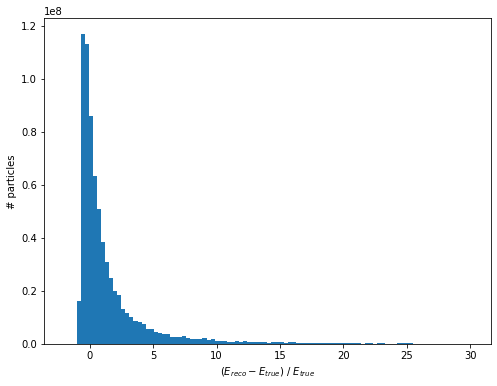

In [20]:
model_visualisation.plot_res_hist(y_train, y_pred_l2, (-2, 30))

In [12]:
model_evaluation.get_scores(y_train, y_pred_l2)

explained_variance_score 0.004779199600631334
max_error 0.9805463265408687
mean_absolute_error 0.13490692869886156
mean_squared_error 0.03141403350796516
mean_squared_log_error 0.018636147097643038
median_absolute_error 0.11544985470272598
r2_score 0.004779199600631223


{'explained_variance_score': 0.004779199600631334,
 'max_error': 0.9805463265408687,
 'mean_absolute_error': 0.13490692869886156,
 'mean_squared_error': 0.03141403350796516,
 'mean_squared_log_error': 0.018636147097643038,
 'median_absolute_error': 0.11544985470272598,
 'r2_score': 0.004779199600631223}